In [1]:
from IPython.core.display import HTML
display(HTML('<style>.container { width:95% !important; } </style>'))

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skewnorm

SEED = 12345
rng = np.random.default_rng(seed=SEED)

In [3]:
ann = 252
T = ann * 10
mu = 0.1 / ann
sigma = 0.2 / np.sqrt(ann)


def sort_abs_rets(rets):
    idx = np.argsort(np.abs(rets))
    return rets[idx]


rets_norm = rng.normal(mu, sigma, size=T)
rets_norm = sort_abs_rets(rets_norm)


df = 1
rets_t = rng.standard_t(1, size=T)
rets_t = mu + rets_t / rets_t.std() * sigma
rets_t = sort_abs_rets(rets_t)

a_pos = 2
rets_pos_skew = skewnorm.rvs(a=a_pos, random_state=rng, size=T)
rets_pos_skew = mu + (rets_pos_skew - rets_pos_skew.mean()) / rets_pos_skew.std() * sigma
rets_pos_skew = sort_abs_rets(rets_pos_skew)

a_neg = -2
rets_neg_skew = skewnorm.rvs(a=a_neg, random_state=rng, size=T)
rets_neg_skew = mu + (rets_neg_skew - rets_neg_skew.mean()) / rets_neg_skew.std() * sigma
rets_neg_skew = sort_abs_rets(rets_neg_skew)

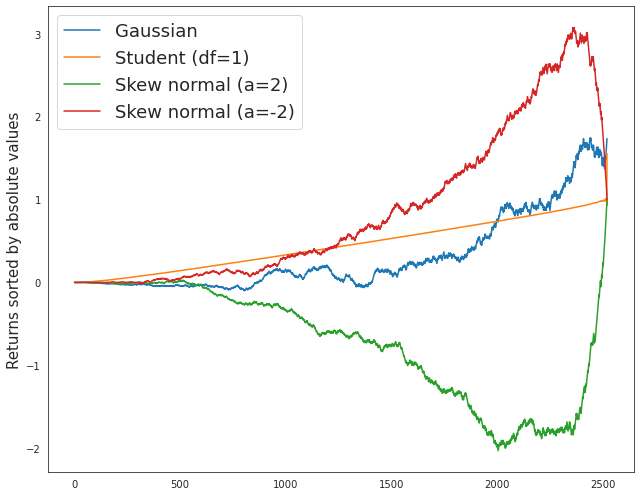

In [4]:
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(9, 7), nrows=1, ncols=1)
    
    ax.plot(np.cumsum(rets_norm), label="Gaussian")
    ax.plot(np.cumsum(rets_t), label=f"Student (df={df})")
    ax.plot(np.cumsum(rets_pos_skew), label=f"Skew normal (a={a_pos})")
    ax.plot(np.cumsum(rets_neg_skew), label=f"Skew normal (a={a_neg})")
    
    ax.legend(fontsize=18)
    ax.set_ylabel("Returns sorted by absolute values", fontsize=15)
    
    fig.tight_layout()